In [1]:
import numpy as np
from matplotlib import colors
from scipy.spatial import cKDTree as KDTree
from scipy.misc import face

In [21]:
REDUCED_COLOR_SPACE = True

# borrow a list of named colors from matplotlib
if REDUCED_COLOR_SPACE:
    use_colors = {k: colors.cnames[k] for k in ['red', 'black', 'white']}
else:
    use_colors = colors.cnames

In [22]:
# translate hexstring to RGB tuple
named_colors = {k: tuple(map(int, (v[1:3], v[3:5], v[5:7]), 3*(16,)))
                for k, v in use_colors.items()}
ncol = len(named_colors)

In [23]:
if REDUCED_COLOR_SPACE:
    ncol -= 1
    #no_match = named_colors.pop('red')
else:
    no_match = named_colors['red']

In [24]:
# make an array containing the RGB values 
color_tuples = list(named_colors.values())
color_tuples.append(no_match)
color_tuples = np.array(color_tuples)

In [25]:
color_names = list(named_colors)
color_names.append('no match')

In [26]:
# get example picture
img = face()

In [27]:
# build tree
tree = KDTree(color_tuples[:-1])
# tolerance for color match `inf` means use best match no matter how
# bad it may be
tolerance = np.inf
# find closest color in tree for each pixel in picture
dist, idx = tree.query(img, distance_upper_bound=tolerance)
# count and reattach names
counts = dict(zip(color_names, np.bincount(idx.ravel(), None, ncol+1)))

In [28]:
print(counts)

import pylab

{'red': 19576, 'black': 467962, 'white': 298894}


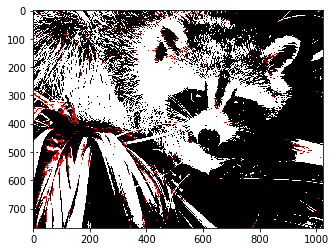

In [29]:
pylab.imshow(img)
pylab.savefig('orig.png')
pylab.clf()
pylab.imshow(color_tuples[idx])
pylab.savefig('minimal.png' if REDUCED_COLOR_SPACE else 'reduced.png')